# Associations and dictionaries

In mathematics, we group numbers or other elements in parentheses, thus, forming a *tuple*. For example, to represent a three-dimensional Euclidean point, we'd use 3-tuple notation like `(32,9,9732)`.  Python uses the same mathematical notation:

In [1]:
p = (32,9,9732)
print(type(p))
print(p)

<class 'tuple'>
(32, 9, 9732)


Because Python also uses parentheses for grouping subexpressions like `(1+2)*3`, there is an ambiguity in the language. Does `(5)` represent a single element tuple containing 5 or is it just the integer 5? It turns out that Python considers it an integer so we use the slightly awkward notation `(5,)` instead to mean a 1-tuple.

Tuples are ordered and so we access the elements using array indexing notation.

In [2]:
print(p[0])
print(p[1])
print(p[2])

32
9
9732


It's really implemented as a list:

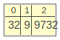

In [3]:
from lolviz import *
objviz(p)

BUT, tuples are **immutable**, meaning you can't change the elements.  For example, `p[0]=34` gives you an error:

`TypeError: 'tuple' object does not support item assignment`.

Relevant to our approaching topic of document analysis, we'll associate a word (string) with the frequency (integer) with which it occurs in the document. For example, if the word "cat" appears 10 times, we'd create a tuple like this:

In [4]:
a = ('cat', 10)
print(type(a))
print(a)

<class 'tuple'>
('cat', 10)


The tuple notation works even when the values are variables not literals:

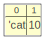

In [5]:
word = 'cat'
freq = 10
a = (word, freq)
listviz(a)

We could define `class`es to access the elements by name, such as `a.word` instead of `a[0]`, but that is overkill for a simple association of two pieces of data.

## Bag of words representation

A document is a sequence of words that we can represent simply as a list of strings. For example, let's split apart a simple document into words:

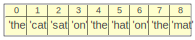

In [6]:
doc = 'the cat sat on the hat on the mat'
words = doc.split(' ')
objviz(words)

Using a list of words preserves the order, which is sometimes important, but often it is not.  When order is not important, we can use the [bag of words](https://en.wikipedia.org/wiki/Bag-of-words_model) representation of a document that records the words and their frequencies. This not only compresses the space needed to represent the document but it also tells us something about the meaning of the document.  For example,   examining the most common words is often useful for searching and machine learning problems. One representation for bag of words is just a list of associations (order of tuples doesn't matter):

In [7]:
from lolviz import *
bag = [('the',3), ('cat',1), ('sat',1), ('on', 2), ('hat',1), ('mat', 1)]
listviz(bag, showassoc=False)

Because we are really using the tuples as associations, I prefer to think of the data structure like this:

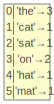

In [8]:
listviz(bag)

That representation is a faithful representation of a bag of words, but looking up word frequencies is not efficient. To find a word, we must linearly scan the list of tuples looking for the word and then plucking out the frequency.

### Exercise

Write a loop that walks `bag` to find and print out the number of occurrences of `'on'`.

In [9]:
bag = [('the',3), ('cat',1), ('sat',1), ('on', 2), ('hat',1), ('mat', 1)]
for a in bag:
    if a[0]=='on':
        print(a[1])
        break

2


### Exercise

What is the complexity, "big O" notation, for walking that list of associations to find a word?

## Counter objects

Here's the easy way to get a bag of words:

In [10]:
from collections import Counter

c = Counter(words)
print(c)
print(c['the']) # access like an array
print(c['on'])

Counter({'the': 3, 'on': 2, 'cat': 1, 'sat': 1, 'hat': 1, 'mat': 1})
3
2


## Dictionaries

A list of tuples representing a list of associations is a perfectly fine way to represent a bag of words.  It implies an order because it's in a list, but we could ignore that. The biggest problem is that lists are slow to search when they get big; $O(n)$. It turns out that there is a very efficient implementation for dictionarys, which makes dictionaries very attractive from an efficiency point of view. In Python, we can also access them using array-like notation. You will learn all about this in your project.

To create a dictionary from a list of associations is easy:

{'the': 3, 'cat': 1, 'sat': 1, 'on': 2, 'hat': 1, 'mat': 1}


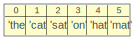

In [11]:
d = dict(bag)
print(d)
objviz(d)

Python prints dictionaries out using `dict` literal notation, which we can use to define dictionaries directly:

{'the': 2, 'sat': 1, 'hat': 1, 'cat': 1}


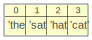

In [12]:
e = {'the': 2, 'sat': 1, 'hat': 1, 'cat': 1}
print(e)
objviz(e)

You can even do *dict comprehensions* similar to list comprehensions:

In [13]:
{c:ord(c) for c in 'abcde'}

{'a': 97, 'b': 98, 'c': 99, 'd': 100, 'e': 101}

Given a dictionary, you can get a list of the associations out as a list of tuples:

dict_items([('the', 2), ('sat', 1), ('hat', 1), ('cat', 1)])


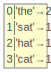

In [14]:
tuples = e.items()
print(tuples)
listviz(tuples)

In implementation, however, dictionaries are actually more complicated than lists of associations in order to get the speed.

Accessing elements of the dictionary looks like array indexing except that the index is an arbitrary object, such as a string in our case:

3
1
99


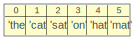

In [15]:
print(d['the'])
print(d['hat'])
d['hat'] = 99    # Replace the value for key hat with 99
print(d['hat'])
objviz(d)

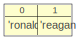

In [16]:
q = {'ronald':{3,4}, 'reagan':{19}}
objviz(q)

Keys can even be tuples (but not lists because lists are not immutable):

In [17]:
td = {(1,2):'parrt', (3,99):'mary'}
print(td)
print( td[(1,2)] ) # (1,2) is the key

{(1, 2): 'parrt', (3, 99): 'mary'}
parrt


Trying to access a key that does not exist in the dictionary causes a `KeyError` so it's best to check if the key exists first:

In [18]:
# print d['foo']     # This would cause a KeyError!
if 'cat' in d:       # hat is indeed in dictionary d
    print(d['cat'])
if 'foo' in d:       # does not exist so we don't get an error on the next line    
    print(d['foo'])   # does not execute

1


## Pointer variables

Even for the atomic elements like integers and floating-point numbers, variables in Python refer or *point* at the data element in memory. 

Refer back to [Python data aliasing from MSDS501](https://github.com/parrt/msds501/blob/master/notes/aliasing.ipynb).

Now that we know about associating words and word frequencies using dictionaries, we can try pulling apart a document into words in the [Intro to information extraction from text](notes/text.ipynb).